In [1]:
#uploading the csv file to google colab
from google.colab import files

uploaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from numpy.random import seed
from sklearn.preprocessing import StandardScaler

In [3]:
#loading the data into the dataframe
df = pd.read_csv('/content/Hotel Reservations.csv')

In [4]:
#understanding the data columns by reading the first 5 rows of data
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
#understanding the data columns by reading the last 5 rows of data
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [6]:
df.shape

(36275, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


<ipython-input-10-2c7dde15f585>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = df.corr()


<Axes: >

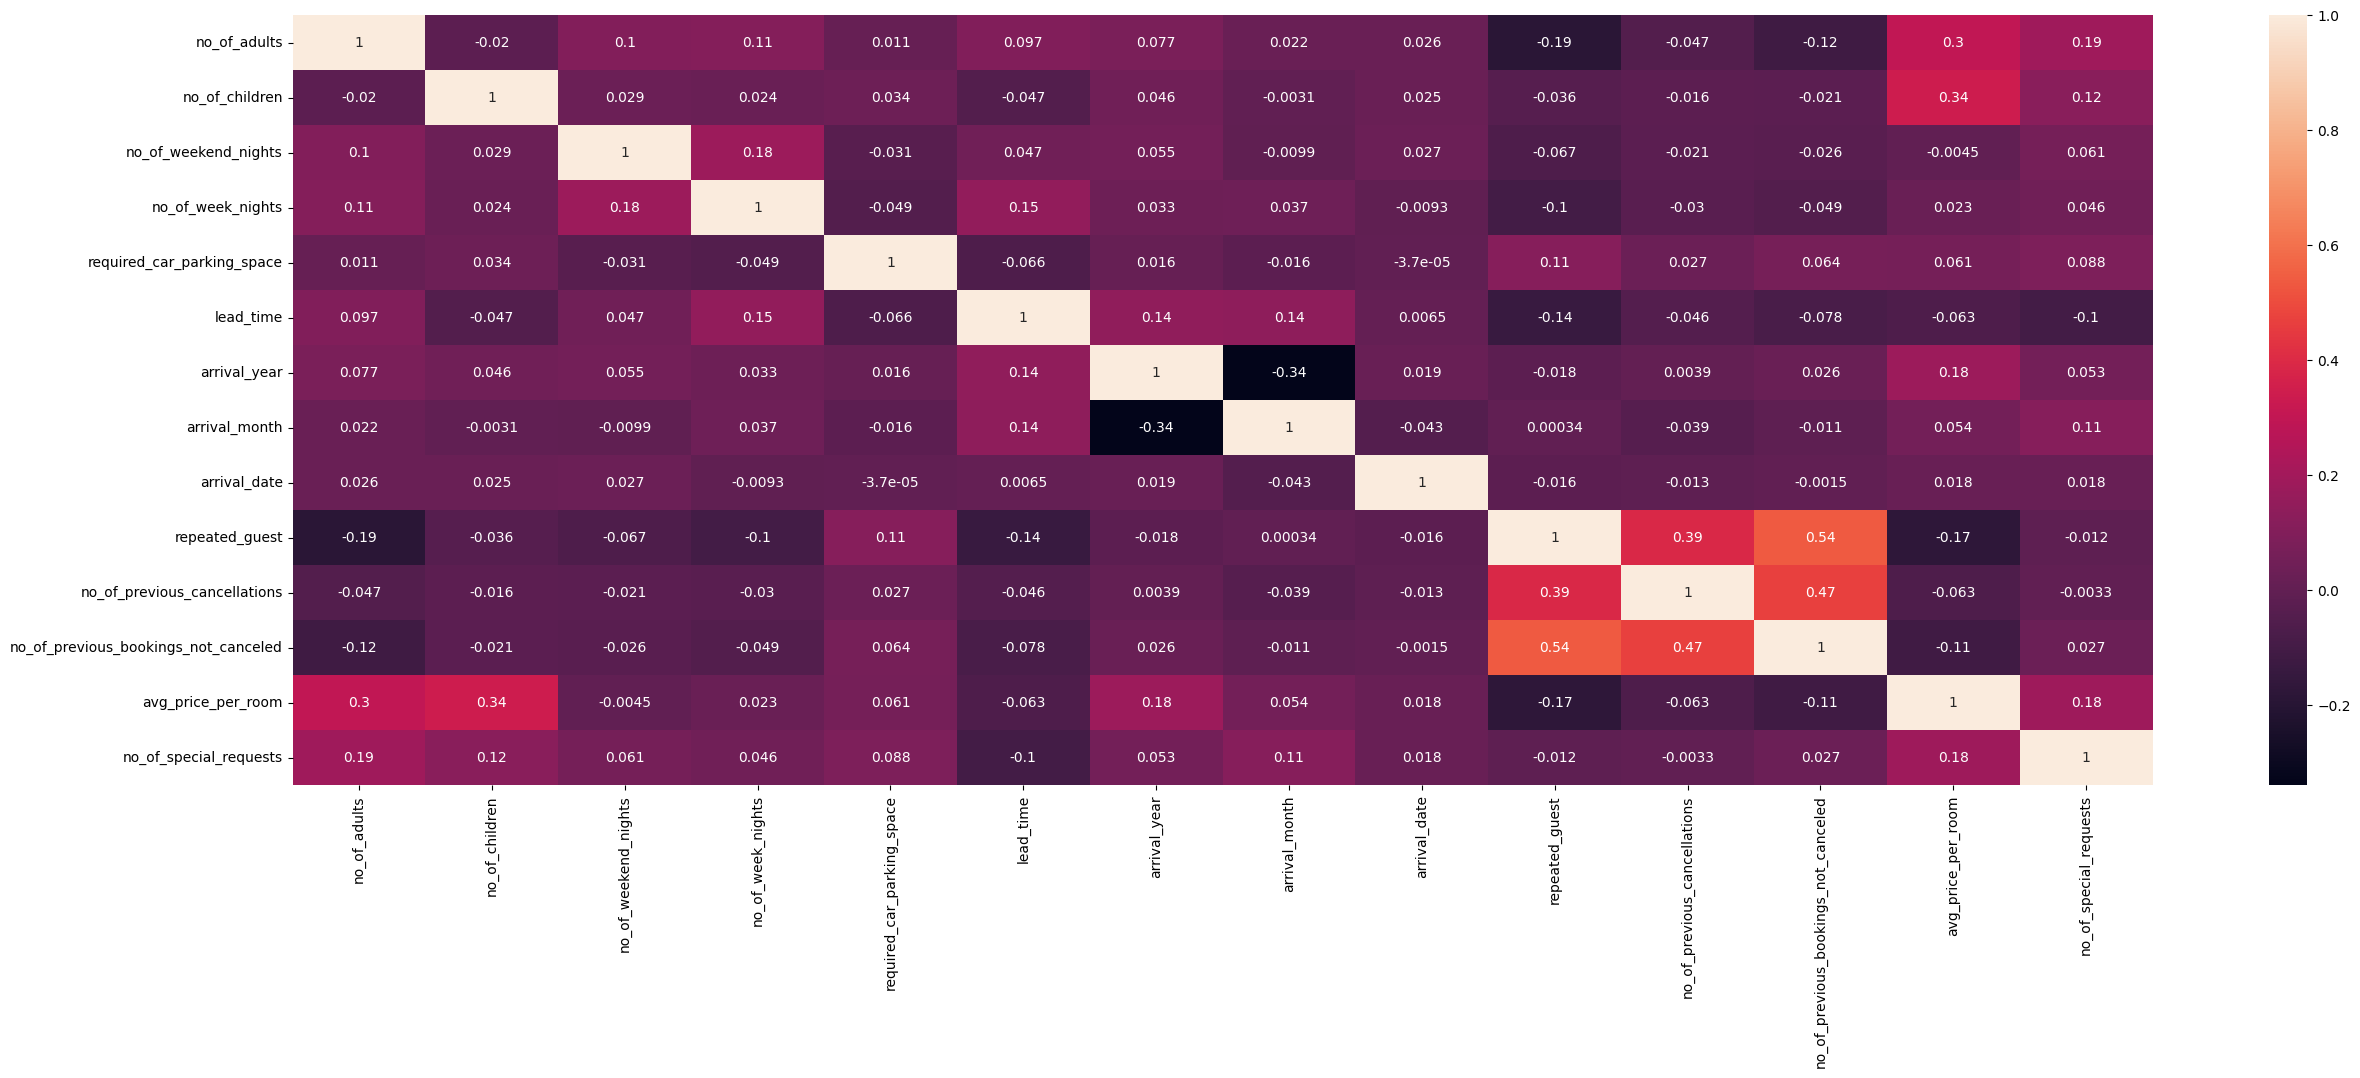

In [10]:
#using correlation to understand columns
fig, ax = plt.subplots(figsize=(30, 10))
corelation = df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

In [11]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [12]:
#checking the datatype of the data present in the datset
df.select_dtypes(include = 'object')


,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...,...
36270,INN36271,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,INN36272,Meal Plan 1,Room_Type 1,Online,Canceled
36272,INN36273,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,INN36274,Not Selected,Room_Type 1,Online,Canceled


In [13]:
#dropping the booking id column because it won't have significant impact on the model for training
df = df.drop(columns = 'Booking_ID')

In [14]:
df.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [15]:
df_encoded = pd.get_dummies(df, drop_first = True)

In [16]:
df_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,1,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,1,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
df_encoded.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'booking_status_Not_Canceled'],
      dtype='object')

In [18]:
X = df_encoded.drop(columns = 'booking_status_Not_Canceled')
Y = df_encoded['booking_status_Not_Canceled']

In [19]:
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,0,0,1,0,0,0,0,0,0,1
36271,2,0,1,3,0,228,2018,10,17,0,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,2018,7,1,0,...,0,0,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,63,2018,4,21,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status_Not_Canceled, Length: 36275, dtype: uint8

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=0)

In [22]:
#verify if the split was successful
print(X.shape, X_train.shape, X_test.shape)

(36275, 27) (29020, 27) (7255, 27)


In [23]:
#Models
logistic_regression_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear')

In [24]:
#training the normal model using lasso l1 as we compared both the method and found this performs better
logistic_regression_l1.fit(X_train,Y_train)
Y_pred=logistic_regression_l1.predict(X_test)

In [25]:
print('Coefficients', logistic_regression_l1.intercept_, logistic_regression_l1.coef_)

Coefficients [0.] [[-4.26182410e-02 -7.71595559e-02 -1.45750350e-01 -3.03819279e-02
   1.69280706e+00 -1.61315173e-02  1.41788533e-03  6.23358621e-02
  -2.54906183e-03  2.34154357e+00 -2.41908137e-01  1.16581770e-01
  -2.04159526e-02  1.46659073e+00 -4.15657602e-02  0.00000000e+00
  -3.18379601e-01  3.99900791e-01  0.00000000e+00  2.52046872e-01
   8.43685478e-01  8.87947885e-01  1.40476814e+00  3.39281046e+00
   8.59733984e-01  1.79239261e+00  0.00000000e+00]]


<Axes: xlabel='Predicted', ylabel='Actual'>

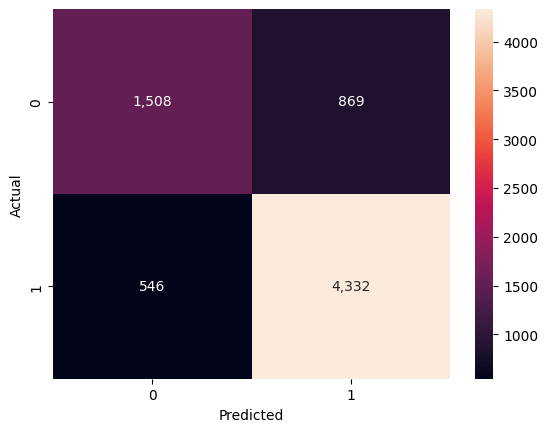

In [26]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt=',d')

<Axes: xlabel='Predicted', ylabel='Actual'>

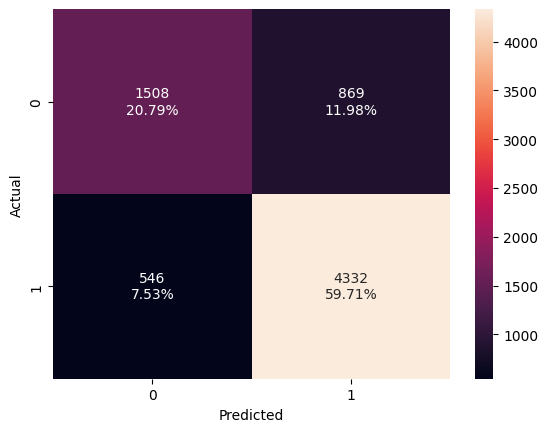

In [27]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
total = float(confusion_matrix.sum().sum())
percentages = (confusion_matrix / total * 100).round(2)
labels = (f"{int(value)}\n{percentages.iloc[row, col]}%" for row in range(confusion_matrix.shape[0]) for col, value in enumerate(confusion_matrix.iloc[row]))
labels = np.asarray(list(labels)).reshape(confusion_matrix.shape)

sns.heatmap(confusion_matrix, annot=labels, fmt='')

In [28]:
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

Accuracy:  0.8049620951068229


In [29]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      2377
           1       0.83      0.89      0.86      4878

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



In [30]:
X_train_prediction = logistic_regression_l1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data', training_data_accuracy)

Accuracy on training data 0.8037560303239145


In [31]:
X_test_prediction = logistic_regression_l1.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on testing data', testing_data_accuracy)

Accuracy on testing data 0.8049620951068229


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
prec = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic Regression,0.804962,0.859609,0.832917,0.888069
